In [1]:
%matplotlib widget
import sys
sys.path.append("../src")

import numpy as np
import matplotlib.pyplot as plt

from SensorTasking import SSA_Problem, greedy_search, search
from SensorTasking.compute_coefficients import compute_coefficients, solve_model
from plotting import render, plot_orbits, visualize_info_vs_phase

In [2]:
# L2 Halo orbit, period = 3.225 TU  (Target orbit)
x0_1 = np.array([
        1.1540242813087864,
        0.0,
        -0.1384196144071876,
        4.06530060663289e-15,
        -0.21493019200956867,
        8.48098638414804e-15
    ])
# same L2 halo but phase = 1/2
x0_10 = np.array([1.06097909e+00,  1.07560735e-10,  7.34778975e-02, -1.44739818e-10,
         3.41397240e-01, -3.07924681e-10])
# same L2 halo but phase = 1/3
x0_13 = np.array([1.0806927 , -0.12323006, -0.00757954, -0.07789012,  0.07947237,
         0.21008552])

# L1 lyapunov, period = 3.225 TU (target orbit)
x0_2 = np.array([
        0.8027692908754149,
        0.0,
        0.0,
        -1.1309830924549648e-14,
        0.33765564334938736,
        0.0
    ])
# L1 lyapunov, period = 3.225 TU (target orbit) but phase = 0.25
x0_11 = np.array([0.87865254, 0.16826693, 0.        , 0.12091167, 0.00891463,
        0.        ])

# L1 lyapunov, period = 3.225 TU (target orbit) but phase = 0.75
x0_12 = np.array([ 0.87865255, -0.16826693,  0.        , -0.12091164,  0.00891462,
         0.        ])


# 1:1 L2 Lyapunov, period = 6.45 TU (observer orbit)
x0_3 = np.array([
        0.9982702689023665,
        0.0,
        0.0,
        -2.5322340091977996e-14,
        1.5325475708886613,
        0.0
    ])

# 1:1 L1 Lyapunov, period = 6.45 TU (observer orbit)
x0_4 = np.array([
            0.65457084231188,
        0.0,
        0.0,
        3.887957091335523e-13,
        0.7413347560791179,
        0.0
])


# 2:1 Resonant, period = 6.45 TU
x0_5 = np.array([
        0.9519486347314083,
        0.0,
        0.0,
        0.0,
        -0.952445273435512,
        0.0
    ])

# 3:1 Resonant, period = 6.45 TY
x0_6 = np.array([
        0.13603399956670137,
        0.0,
        0.0,
        1.9130717669166003e-12,
        3.202418276067991,
        0.0
    ])

# L2 Lyapunov, period = 3.7132531304869154 TU
x0_9 = np.array([
    	1.0636292377522296E+0,
        -3.1952388095755208E-28,	
        9.6105846729337803E-36,	
        4.8862169349265717E-15,	
        4.6223063293086447E-1,	
        -9.4408653291941199E-34
])


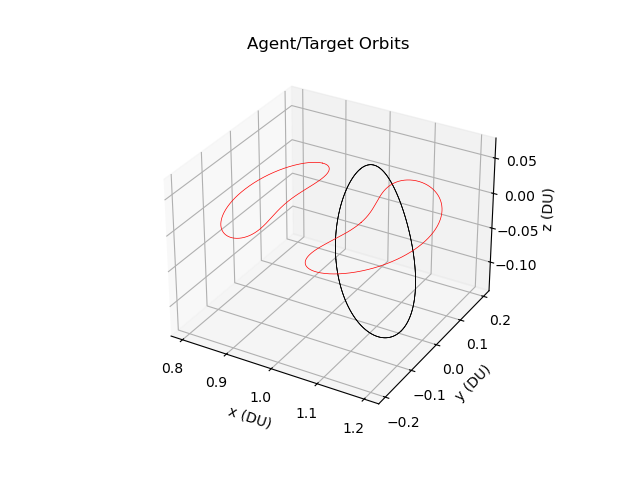

In [3]:
opt = "max"
Y = np.array([x0_10, x0_1, x0_13])
Y_periods = np.array([3.225, 3.225, 3.225])

X = np.array([x0_11, x0_9])
X_periods = np.array([3.225, 3.7132531304869154])

prob = SSA_Problem(target_ics=Y.tolist(),
                   target_periods=Y_periods.tolist(),
                   agent_ics=X.tolist(),
                   agent_periods=X_periods.tolist(),
                   opt=opt)
plot_orbits(prob, fig=10, projection="3d")

In [ ]:
plt.figure(1)
# phases = np.linspace(0.385, 0.3865, 40)
phases = np.linspace(0., 1.0, 40)
visualize_info_vs_phase(prob, phases, observer=1, fig=1, fixed_phases=[0.0])

In [ ]:
plt.figure(2)
# phases = np.linspace(0.385, 0.3865, 40)
phases = np.linspace(0., 1.0, 40)
visualize_info_vs_phase(prob, phases, observer=2, fig=2, fixed_phases=[0.1])

In [ ]:
coef = compute_coefficients(prob.env)
control, obj= solve_model(coef)
print(f"{opt} obj = {obj}")

In [ ]:
ani = render(prob, x=[0.0, 0.0], fig=11, control=control)

In [6]:
init_phase_guess = [[0.111, 0.5, 0.7, 1.0], [0.8, 0.5]]
phases, control, objective = greedy_search(Y, Y_periods, X, X_periods, init_phase_guess=init_phase_guess, opt=opt)
print(f"obj type: ", opt)
print("log obj ", np.log(objective))
print("phases ", phases)

Beginning Optimization...

Set parameter Username
Academic license - for non-commercial use only - expires 2025-03-20
Finished in 3.2365241050720215 sec.
obj type:  max
log obj  27.566874342978622
phases  [0.11100337533443677, 0.980553157972059]


In [7]:
phs, ctrl, obj = search(Y, Y_periods, X, X_periods, init_phase_guess=[[0.111, 0.8]], opt=opt)
print(f"obj type: ", opt)
print("log obj ", np.log(obj))
print("phases ", phs)

Beginning Optimization...

Finished in 4.84066104888916 sec.
obj type:  max
log obj  27.56687434297772
phases  [0.11100395524712467, 0.9805531393380854]


In [8]:
np.where(ctrl != control)

(array([], dtype=int64), array([], dtype=int64), array([], dtype=int64))